# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics, model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import textwrap
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output
import plotly.graph_objects as go
import voila

## With nearly 800,000 people suffering from stroke per year in the United States, and three in four being first-time stroke patients, stroke is the leading cause of long-term disability (The Importance, 2018). By having the ability to predict stroke, intervention can take place to reduce a patient’s risk of having a stroke, and the life-altering permanent challenges that can come with having a stroke.

In [78]:
# Help Button 
button = widgets.Button(description="Help")
output = widgets.Output()

display(button, output)

def help_button(b):
    with output:
        print("This dashboard is used to show prediction of strokes. Please email tarabentley2016@gmail.com if you have questions or concerns using this product.")

button.on_click(help_button)

Button(description='Help', style=ButtonStyle())

Output()

In [23]:
import requests
import io

url = "https://raw.githubusercontent.com/tarabentley2016/CapstoneProject2/main/healthcare-dataset-stroke-data.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
# Showing that this could also be done from a downloaded file
# df = pd.read_csv("C:/Users/Tara/Downloads/healthcare-dataset-stroke-data.csv")

## This dataset is provided from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset. It is a free, and publiclly available dataset and does not contain any personal information from patients.

## This is a glimpse of the stroke data provided:

In [ ]:
# Print portion of the data
display(df)

In [ ]:
# Number of rows and columns
# df.shape

In [ ]:
# View the column names, number of entries in each column, and data types
# df.info()

In [ ]:
# Calculate the number of null entires within the bmi column
# sum(df.bmi.isnull())

In [4]:
# Use mean imputation to resolve missing data
mean = df.bmi.mean()
df.loc[df['bmi'].isnull(),'bmi'] = mean

In [5]:
# Since the columns for gender, ever_married, work_type, residence_type, and smoking_status
# are categorical rather than numerical, label encoding will assign codes to each distinct entry.
le=preprocessing.LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_status'] = le.fit(df['smoking_status'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['ever_married'] = le.fit_transform(df['ever_married'])

In [ ]:
# Verify that there is no missing data in the new dataframe
#df.info()

In [ ]:
# Since the columns for gender, ever_married, work_type, residence_type, and smoking_status
# are categorical rather than numerical, label encoding will assign codes to each distinct entry.
le=preprocessing.LabelEncoder()

In [ ]:
df['gender'] = le.fit_transform(df['gender'])
df['smoking_status'] = le.fit(df['smoking_status'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['ever_married'] = le.fit_transform(df['ever_married'])

In [ ]:
# Verify that there are no object data types within the dataframe
# df.info()

In [6]:
# Set the target and feature variables
# Seperate the stroke column, as this will be the target variable
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Exploratory Data Analysis

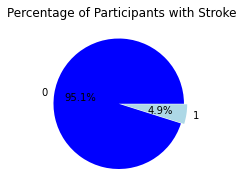

In [7]:
# Visualize the data  
def get_fig():
    plt.figure(figsize=(3,3))
    plt.pie(df['stroke'].value_counts(sort = True),
        explode = (0.05, 0), 
        labels = df['stroke'].value_counts(sort = True).index,
        colors = ["blue","lightblue"], 
        autopct = '%1.1f%%')
    plt.title('Percentage of Participants with Stroke')
    plt.show
get_fig()

# This shows us that 4.9% of respondents had a stroke.

## The dataset shows that 4.9% of respondents had a stroke.

<AxesSubplot:title={'center':'Correlation with Stroke'}>

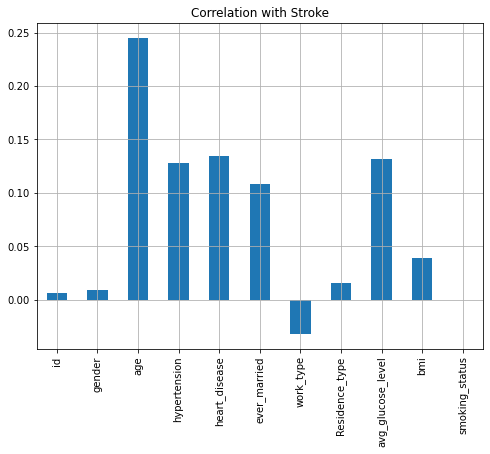

In [8]:
# Now lets visualize how the feature variables correlate with the target variable.
X.corrwith(y).plot(kind='bar', grid=True, figsize=(8, 6), title="Correlation with Stroke")

## Age, heart_disease, avg_glucose_level, hypertension, and ever_married have the highest correlation with stroke, with age by far having the highest correlation with stroke. Also, id, gender, work_tye, and residence_type have the least correlation. 

<AxesSubplot:>

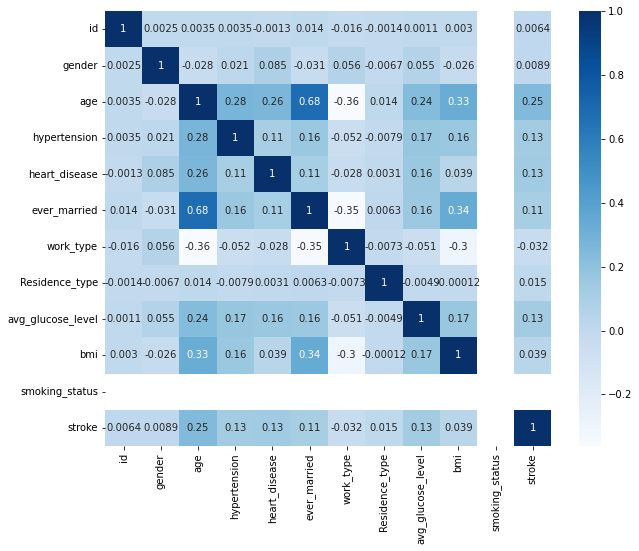

In [9]:
# Another way to visualize the correlation is through a correlation matrix 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'Blues',annot=True)

## Visualize each factor's data by selecting a factor from the dropdown menu. This shows the count of each of the entries from the selected factor.

In [82]:
# Help Button 
button_viz = widgets.Button(description="Help")
output = widgets.Output()

display(button_viz, output)

def viz_button(b):
    with output:
        print("Select a factor from the dropdown menu. Scroll over the histogram produced to view the exact numbers within the chart.")
button_viz.on_click(viz_button)

Button(description='Help', style=ButtonStyle())

Output()

In [76]:
import plotly.express as px

fig = go.Figure()

buttons = []
for col_name in df.columns:
    if col_name == "Open":
        fig.add_trace(go.Histogram(
            y=df.index,
            x=df[col_name],
            name=col_name,
            visible=True
            )
        )
    else:
        fig.add_trace(go.Histogram(
            y=df.index,
            x=df[col_name],
            name=col_name,
            visible=False
            )
        )

    buttons.append(dict(
        label=col_name,
        method="update",
        args=[{"visible": [col_name==col for col in df.columns]},
        {"title": "Factor against Stroke Count"}]))

buttons_list = list(buttons)

fig.update_layout(
    updatemenus=[
        dict(buttons=buttons_list)
    ])

yranges = [0, 5000]

for f in fig.frames:
    if int(f.index) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.index)])

fig.show()

In [11]:
# We split the data between 80% training and 20% testing for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# Now we can scale the data to remove bias from the model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

## Select a model by clicking one of the buttons 

In [166]:
# Help Button 
button_mod = widgets.Button(description="Help")
output = widgets.Output()

display(button_mod, output)

def mod_button(b):
    with output:
        print("Choose a classification model by clicking one of the buttons. The accuracy score and confusion matrix. The top left number represents true negatives. The top right shows false positives or type 1 errors. The bottom left shows false negatives or type 2 errors, and the bottom right shows true positives (predicted to have a stroke). To compare accuracy, precision, recall, and F1 scores in one visualization, for all models, click the 'Report All' button.")
button_mod.on_click(mod_button)

Button(description='Help', style=ButtonStyle())

Output()

In [125]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

button1 = widgets.Button(description="K-NN")
button2 = widgets.Button(description="SVM")
button3 = widgets.Button(description="Decision Trees")
button5 = widgets.Button(description="Random Forest")
button4 = widgets.Button(description="Logistic Regression")
button6 = widgets.Button(description="Naive Bayes")
button7 = widgets.Button(description="Bagging Classifier")
button8 = widgets.Button(description="XGBoosting")
output = widgets.Output()

display(button1, button2, button3, button4, button5, button6, button7, button8, output)

def knn_button(b):
    with output:
        knn_clf = KNeighborsClassifier()
        knn_clf.fit(X_train, y_train)
        y_pred_knn = knn_clf.predict(X_test)
        compare['K-NN'] = [accuracy_score(y_test,y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)]
        cm = confusion_matrix(y_test, y_pred_knn)
        sns.heatmap(cm, center=True, fmt='', cmap='Blues', annot=True)
        plt.title(' K-NN Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show()
        print('K-NN has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_knn))

# The k-nearest neighbors model has a 93.8% accuracy and with 1 false positive and 62 false negatives.
button1.on_click(knn_button)

def svm_button(b):
    # We can also apply a support vector machine (SVM) model 
    SVM = SVC(random_state = 0, kernel = 'linear')
    SVM.fit(X_train, y_train)
    y_pred_SVM = SVM.predict(X_test)
    compare['SVM'] = [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM)]
    cm = confusion_matrix(y_test, y_pred_SVM)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('SVM Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print('SVM has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_SVM))
    
button2.on_click(svm_button)

def dt_button(b):
# Decision Trees Classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt = dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    compare['Decision Trees'] = [accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)]
    cm = confusion_matrix(y_test, y_pred_dt)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('Decision Trees Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print('Decision tree classifier has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_dt))

# Decision tree classifier has a 91.4% accuracy

button3.on_click(dt_button)

def log_button(b):
    # Logistic Regression
    log_reg = LogisticRegression(solver = 'liblinear')
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)
    compare['Logistic Regression'] = [accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)]
    cm = confusion_matrix(y_test, y_pred_log)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('Logistic Regression Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print('Logistic Regression has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_log))

# Logistic Regression has a 91.4% accuracy

button4.on_click(log_button)

def rf_button(b):
    # Random Forest Classifier 
    rf = RandomForestClassifier(n_estimators = 25)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    compare['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]
    cm = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print('Random Forest has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_rf))

# Random forest classifier has a 93.6% accuracy

button5.on_click(rf_button)

def nb_button(b):
    #Gaussian naive bayes model
    nb = GaussianNB()
    nb.fit = nb.fit(X_train,y_train)
    y_pred_nb = nb.predict(X_test)
    compare['Naive Bayes'] = [accuracy_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb), f1_score(y_test, y_pred_nb)]
    cm = confusion_matrix(y_test, y_pred_nb)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('Naive Bayes Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print('Naive Bayes has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_nb))
# Gaussian Naive Bayes model has a 87.2% accuracy

button6.on_click(nb_button)

def bag_button(b):
    # Bagging Classifier
    model = ensemble.BaggingClassifier()
    model.fit(X_train, y_train)
    y_pred_bag = model.predict(X_test) 
    compare['Bagging'] = [accuracy_score(y_test, y_pred_bag) , precision_score(y_test, y_pred_bag), recall_score(y_test, y_pred_bag), f1_score(y_test, y_pred_bag)]
    cm = confusion_matrix(y_test, y_pred_bag)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('Bagging Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print('Bagging Classiier has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_bag))

button7.on_click(bag_button)

def xg_button(b):
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=10)
    model.fit(X_train, y_train)
    y_pred_xg = model.predict(X_test)
    compare['XGBoosting'] = [accuracy_score(y_test, y_pred_xg), precision_score(y_test, y_pred_xg), recall_score(y_test, y_pred_xg), f1_score(y_test, y_pred_xg)]
    cm = confusion_matrix(y_test, y_pred_xg)
    sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
    plt.title('XGBoosting Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    print ('XGBoost has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_xg))

button8.on_click(xg_button)


Button(description='K-NN', style=ButtonStyle())

Button(description='SVM', style=ButtonStyle())

Button(description='Decision Trees', style=ButtonStyle())

Button(description='Logistic Regression', style=ButtonStyle())

Button(description='Random Forest', style=ButtonStyle())

Button(description='Naive Bayes', style=ButtonStyle())

Button(description='Bagging Classifier', style=ButtonStyle())

Button(description='XGBoosting', style=ButtonStyle())

Output()

Button(description='Report All', style=ButtonStyle())

Output()

                     Accuracy  Precision    Recall  F1 Score
XGBoosting           0.940313   1.000000  0.016129  0.031746
SVM                  0.939335   0.000000  0.000000  0.000000
Logistic Regression  0.939335   0.000000  0.000000  0.000000
K-NN                 0.938356   0.000000  0.000000  0.000000
Random Forest        0.938356   0.333333  0.016129  0.030769
Bagging              0.936399   0.285714  0.032258  0.057971
Decision Trees       0.914873   0.272727  0.241935  0.256410
Naive Bayes          0.871820   0.228346  0.467742  0.306878


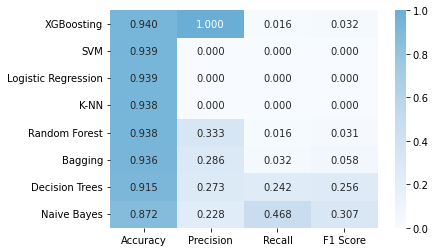

In [164]:
import warnings
import plotly.graph_objects as px
warnings.filterwarnings('ignore')

compare = {}
button9 = widgets.Button(description = "Report All")
output = widgets.Output()
display(button9, output)

# Modeling Reports
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
compare['K-NN'] = [accuracy_score(y_test,y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)]

# We can also apply a support vector machine (SVM) model 
SVM = SVC(random_state = 0, kernel = 'linear')
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
compare['SVM'] = [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM)]

# Decision Trees Classifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
compare['Decision Trees'] = [accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)]


# Logistic Regression
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
compare['Logistic Regression'] = [accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)]

    # Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
compare['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]


nb = GaussianNB()
nb.fit = nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
compare['Naive Bayes'] = [accuracy_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb), f1_score(y_test, y_pred_nb)]


model = ensemble.BaggingClassifier()
model.fit(X_train, y_train)
y_pred_bag = model.predict(X_test) 
compare['Bagging'] = [accuracy_score(y_test, y_pred_bag) , precision_score(y_test, y_pred_bag), recall_score(y_test, y_pred_bag), f1_score(y_test, y_pred_bag)]

model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=10)
model.fit(X_train, y_train)
y_pred_xg = model.predict(X_test)
compare['XGBoosting'] = [accuracy_score(y_test, y_pred_xg), precision_score(y_test, y_pred_xg), recall_score(y_test, y_pred_xg), f1_score(y_test, y_pred_xg)]

import seaborn as sns
def report_button(b):
    com = pd.DataFrame.from_dict(compare).T
    com.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    com = com.sort_values('Accuracy', ascending=False)
    sns.heatmap(com, center = True, fmt='.3f', cmap='Blues', annot=True)
    
button9.on_click(report_button)

# Conclusion
- Age is the main factor which can predict stroke and we recommend special care to prevent stroke for those more at risk (such as also having heart disease or high average glucose level) while growing older. 
- The best performing model for predicting stroke was XGBoost with a 94% accuracy rate and with better false negative and posive rates than the other models considered.

## References:
### The importance of stroke awareness and prevention (2018, May 30). The University of Kansas Health System. https://kutopeka.com/news/importance-stroke-awareness-and-prevention 